# USL FINAL EXAM

### Dataset Information: 

The customer bying pattern and their charecteristics of visiting the e-commerce portal was captured in the dataset. This dataset can be used for churn analytics. Here in this work, the objective is to segment the customers based on the provided charecteristics. 

### ATTRIBUTES:
1. 'Customer ID''Total_Sale', 
2. 'STD_Sales', 
3. 'Hist_Visits', 
4. 'W1_Min_Sale', 
5. 'W1_STD_Sales',
6. 'W1_Visits', 
7. 'W2_Min_Sale', 
8. 'W2_STD_Sales', 
9. 'W2_Visits', 
10. 'W3_Sale',
11. 'W3_Max_Sale', 
12. 'W3_Min_Sale', 
13. 'W3_STD_Sales', 
14. 'W3_Visits', 
15. 'W4_Sale',
16. 'W4_Min_Sale', 
17. 'W4_STD_Sales', 
18. 'W4_Visits', 
19. 'W5_STD_Sales', 
20. 'W5_Visits',
21. 'week_1', 
22. 'week_2', 
23. 'week_3', 
24. 'week_4', 
25. 'APV', 
26. 'Days_since_last_visit',
27. 'Customer_Value', 
28. 'Visitors_Type'

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.cluster import silhouette_visualizer

### 1.	Data Understanding (5 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print the number of rows, cols and types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category.  (1 MARK)

d.	Generate the covariance and correlation tables for the data (1 MARK)

e.	Create Visualization plots to find the relationship amongst the variables. (1 MARK)


In [6]:
#(a)
df = pd.read_csv("data_set.csv")
df.head()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,Customer_Value,Visitors_Type
0,1123606416,6.174536,2.286530,1.945910,4.241039,0.000000,1,4.461300,0.000000,1,...,0.000000,1,1,1,1,1,4.393131,1.098612,Regular,Regular_Visitors
1,1174135872,7.351749,4.087801,2.564949,4.461300,4.119498,2,4.794467,3.422721,3,...,0.000000,1,1,1,1,1,4.873873,1.609438,Regular,Regular_Visitors
2,1108114998,6.307807,2.286530,1.945910,4.461300,0.000000,2,0.000000,0.000000,0,...,0.000000,1,1,0,1,1,4.525116,1.098612,Regular,Regular_Visitors
3,1123606602,7.450986,3.234717,3.295837,3.958143,3.559136,6,3.958143,3.176757,5,...,3.283914,4,1,1,1,1,4.207307,0.000000,Regular,Frequent_Visitor
4,1123606376,6.901697,2.791937,1.791759,5.330010,0.000000,1,5.330010,0.000000,1,...,0.000000,1,1,1,1,1,5.296275,1.609438,Regular,Regular_Visitors


In [7]:
df.shape
# There are 10007 rows and 29 columns

(10007, 29)

In [11]:
df.dtypes
# There are 17 float data types 
# 10 int64 datatypes
# 2 object data types

CUSTOMER_ID                int64
Total_Sale               float64
STD_Sales                float64
Hist_Visits              float64
W1_Min_Sale              float64
W1_STD_Sales             float64
W1_Visits                  int64
W2_Min_Sale              float64
W2_STD_Sales             float64
W2_Visits                  int64
W3_Sale                  float64
W3_Max_Sale              float64
W3_Min_Sale              float64
W3_STD_Sales             float64
W3_Visits                  int64
W4_Sale                  float64
W4_Min_Sale              float64
W4_STD_Sales             float64
W4_Visits                  int64
W5_STD_Sales             float64
W5_Visits                  int64
week_1                     int64
week_2                     int64
week_3                     int64
week_4                     int64
APV                      float64
Days_since_last_visit    float64
Customer_Value            object
Visitors_Type             object
dtype: object

In [13]:
#(b)
df.describe(include = np.number).T
# The below table represents the mean,standard deviation,min,max of the numerical data

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,10007.0,9.216436e+08,3.776951e+08,141546.000000,1.030753e+09,1.085524e+09,1.123593e+09,1.201021e+09
Total_Sale,10007.0,6.238656e+00,9.446063e-01,0.000000,5.552184e+00,6.307807e+00,6.952078e+00,9.332576e+00
STD_Sales,10007.0,2.625358e+00,1.811266e+00,0.000000,0.000000e+00,3.176757e+00,3.974285e+00,6.743348e+00
Hist_Visits,10007.0,1.742498e+00,6.083594e-01,0.693147,1.386294e+00,1.791759e+00,2.197225e+00,3.496508e+00
W1_Min_Sale,10007.0,2.752946e+00,2.321018e+00,0.000000,0.000000e+00,3.958143e+00,4.461300e+00,8.234140e+00
W1_STD_Sales,10007.0,6.341095e-01,1.436332e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.071294e+00
W1_Visits,10007.0,1.045968e+00,1.195420e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
W2_Min_Sale,10007.0,2.832834e+00,2.301659e+00,0.000000,0.000000e+00,3.958143e+00,4.461300e+00,7.851272e+00
W2_STD_Sales,10007.0,6.674494e-01,1.467786e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.669331e+00
W2_Visits,10007.0,1.090637e+00,1.211610e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00


In [15]:
#(c)
for i in df.select_dtypes(include="object").columns:
    count = df.select_dtypes(include="object")[i].value_counts()
    percentage = (count/len(df))*100
    print(count)
    print(percentage)

Regular       9998
Low_Value        7
High_Value       2
Name: Customer_Value, dtype: int64
Regular       99.910063
Low_Value      0.069951
High_Value     0.019986
Name: Customer_Value, dtype: float64
Regular_Visitors    8843
Rare_Visitor         992
Frequent_Visitor     172
Name: Visitors_Type, dtype: int64
Regular_Visitors    88.368142
Rare_Visitor         9.913061
Frequent_Visitor     1.718797
Name: Visitors_Type, dtype: float64


In [17]:
#(d)
df.corr()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
CUSTOMER_ID,1.000000,-0.045395,-0.025299,-0.025332,-0.042395,-0.026809,-0.034189,-0.042538,-0.006415,-0.022018,...,0.000761,0.004718,-0.001327,0.004239,-0.039156,-0.038494,-0.021222,-0.001585,-0.039609,0.053435
Total_Sale,-0.045395,1.000000,0.574559,0.807236,0.572451,0.406533,0.575623,0.575878,0.412167,0.583619,...,0.408779,0.580170,0.317827,0.373395,0.537793,0.539392,0.562091,0.554690,0.573794,-0.615748
STD_Sales,-0.025299,0.574559,1.000000,0.485966,0.310642,0.307505,0.295676,0.324217,0.320515,0.299231,...,0.320516,0.310816,0.295450,0.214859,0.306704,0.315896,0.340481,0.347636,0.272705,-0.373467
Hist_Visits,-0.025332,0.807236,0.485966,1.000000,0.570106,0.480544,0.740025,0.586299,0.489026,0.758661,...,0.489992,0.767717,0.370705,0.525732,0.611885,0.625175,0.653482,0.661402,-0.014341,-0.714578
W1_Min_Sale,-0.042395,0.572451,0.310642,0.570106,1.000000,0.306178,0.666922,0.325019,0.204681,0.327266,...,0.183911,0.278658,0.106139,0.135026,0.980065,0.321673,0.363675,0.291868,0.167639,-0.809044
W1_STD_Sales,-0.026809,0.406533,0.307505,0.480544,0.306178,1.000000,0.647644,0.223490,0.321408,0.372744,...,0.276001,0.329993,0.204281,0.247968,0.364792,0.242666,0.233355,0.236211,0.051575,-0.449338
W1_Visits,-0.034189,0.575623,0.295676,0.740025,0.666922,0.647644,1.000000,0.335246,0.360005,0.578596,...,0.327667,0.512421,0.243612,0.367851,0.722992,0.368429,0.371074,0.348493,-0.016692,-0.770793
W2_Min_Sale,-0.042538,0.575878,0.324217,0.586299,0.325019,0.223490,0.335246,1.000000,0.303860,0.659481,...,0.195839,0.305796,0.115747,0.148975,0.321200,0.979682,0.338480,0.335143,0.148916,-0.472503
W2_STD_Sales,-0.006415,0.412167,0.320515,0.489026,0.204681,0.321408,0.360005,0.303860,1.000000,0.648194,...,0.293440,0.351819,0.230018,0.270016,0.225214,0.361960,0.225551,0.239164,0.049724,-0.302060
W2_Visits,-0.022018,0.583619,0.299231,0.758661,0.327266,0.372744,0.578596,0.659481,0.648194,1.000000,...,0.351533,0.549397,0.257652,0.394074,0.361817,0.716510,0.360328,0.371340,-0.028429,-0.505793


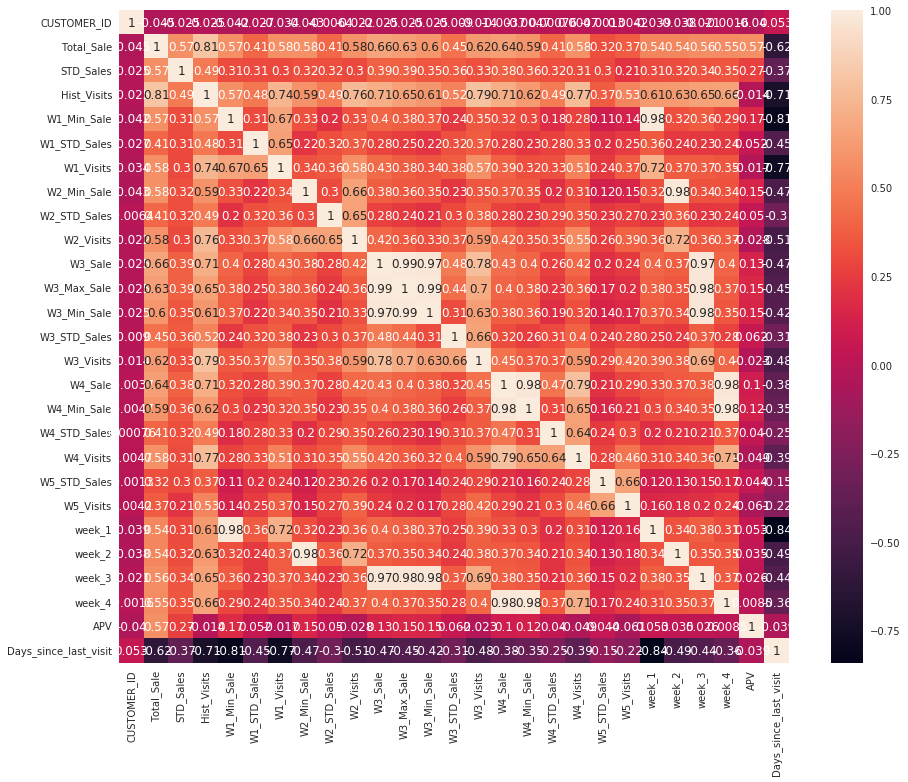

In [20]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),annot = True)

In [21]:
df.cov()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
CUSTOMER_ID,1.426536e+17,-1.619576e+07,-1.730730e+07,-5.820679e+06,-3.716527e+07,-1.454389e+07,-1.543633e+07,-3.697904e+07,-3.556215e+06,-1.007600e+07,...,425539.289238,2.218989e+06,-691228.290948,1.102278e+06,-7.262147e+06,-7.084525e+06,-3.801615e+06,-290197.300525,-8.145887e+06,2.210830e+07
Total_Sale,-1.619576e+07,8.922811e-01,9.830318e-01,4.638865e-01,1.255068e+00,5.515713e-01,6.499944e-01,1.252052e+00,5.714608e-01,6.679484e-01,...,0.571496,6.824721e-01,0.414068,2.428359e-01,2.494572e-01,2.482754e-01,2.518265e-01,0.253975,2.951288e-01,-6.371547e-01
STD_Sales,-1.730730e+07,9.830318e-01,3.280685e+00,5.354862e-01,1.305932e+00,7.999979e-01,6.402038e-01,1.351633e+00,8.521046e-01,6.566762e-01,...,0.859222,7.010747e-01,0.738068,2.679342e-01,2.727921e-01,2.788078e-01,2.924953e-01,0.305208,2.689557e-01,-7.410123e-01
Hist_Visits,-5.820679e+06,4.638865e-01,5.354862e-01,3.701011e-01,8.049969e-01,4.199024e-01,5.381796e-01,8.209574e-01,4.366716e-01,5.592045e-01,...,0.441187,5.816208e-01,0.311042,2.202004e-01,1.827931e-01,1.853274e-01,1.885550e-01,0.195036,-4.750438e-03,-4.762125e-01
W1_Min_Sale,-3.716527e+07,1.255068e+00,1.305932e+00,8.049969e-01,5.387122e+00,1.020722e+00,1.850435e+00,1.736314e+00,6.972967e-01,9.203258e-01,...,0.631770,8.054305e-01,0.339767,2.157690e-01,1.117026e+00,3.638075e-01,4.003466e-01,0.328363,2.118648e-01,-2.057034e+00
W1_STD_Sales,-1.454389e+07,5.515713e-01,7.999979e-01,4.199024e-01,1.020722e+00,2.063051e+00,1.112018e+00,7.388451e-01,6.776011e-01,6.486765e-01,...,0.586732,5.902537e-01,0.404681,2.452129e-01,2.572941e-01,1.698406e-01,1.589705e-01,0.164454,4.033656e-02,-7.069992e-01
W1_Visits,-1.543633e+07,6.499944e-01,6.402038e-01,5.381796e-01,1.850435e+00,1.112018e+00,1.429028e+00,9.224130e-01,6.316715e-01,8.380279e-01,...,0.579732,7.628263e-01,0.401652,3.027515e-01,4.244083e-01,2.146113e-01,2.103902e-01,0.201932,-1.086506e-02,-1.009367e+00
W2_Min_Sale,-3.697904e+07,1.252052e+00,1.351633e+00,8.209574e-01,1.736314e+00,7.388451e-01,9.224130e-01,5.297633e+00,1.026544e+00,1.839102e+00,...,0.667136,8.764979e-01,0.367434,2.360738e-01,3.630330e-01,1.098764e+00,3.695028e-01,0.373905,1.866321e-01,-1.191344e+00
W2_STD_Sales,-3.556215e+06,5.714608e-01,8.521046e-01,4.366716e-01,6.972967e-01,6.776011e-01,6.316715e-01,1.026544e+00,2.154395e+00,1.152738e+00,...,0.637464,6.430724e-01,0.465645,2.728634e-01,1.623260e-01,2.588818e-01,1.570190e-01,0.170156,3.974040e-02,-4.856761e-01
W2_Visits,-1.007600e+07,6.679484e-01,6.566762e-01,5.592045e-01,9.203258e-01,6.486765e-01,8.380279e-01,1.839102e+00,1.152738e+00,1.467998e+00,...,0.630381,8.289492e-01,0.430553,3.287259e-01,2.152693e-01,4.230222e-01,2.070644e-01,0.218084,-1.875567e-02,-6.713160e-01


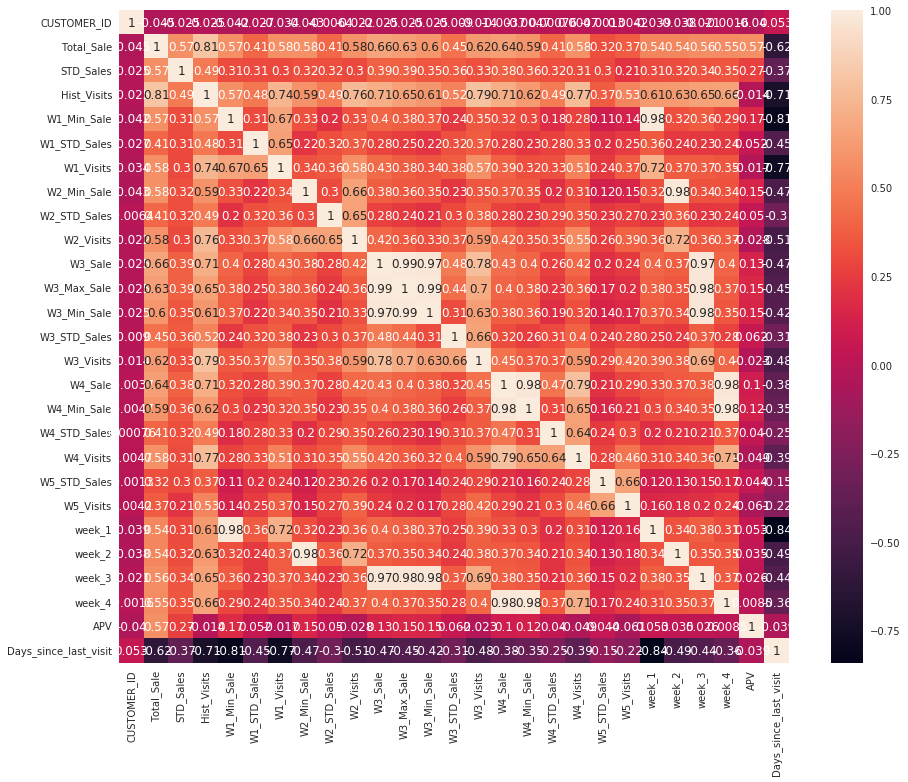

In [23]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),annot = True)

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


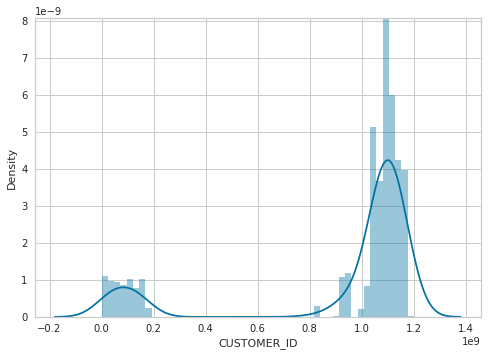

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


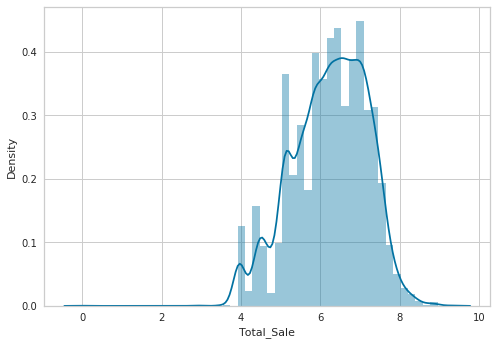

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


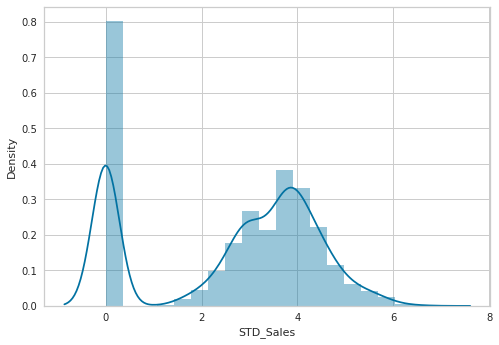

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


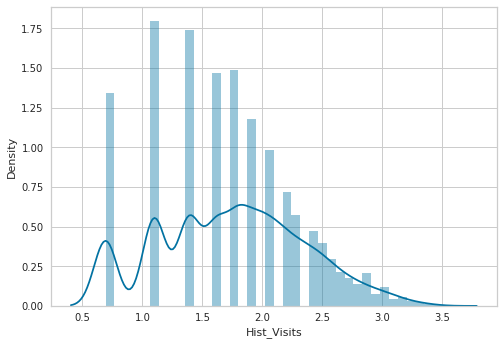

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


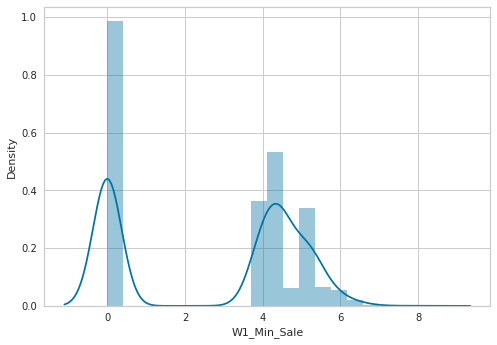

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


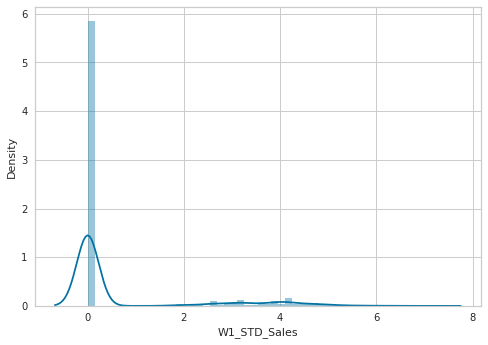

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


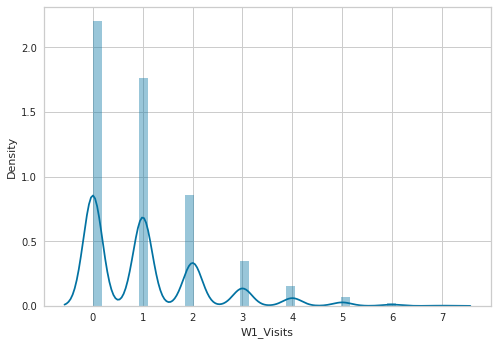

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


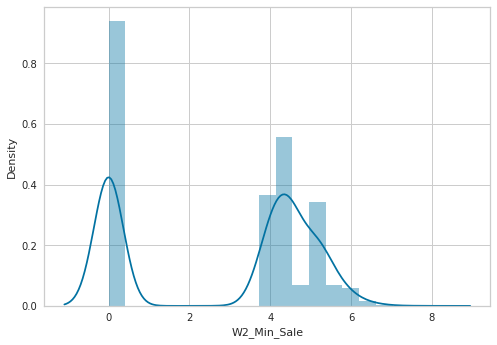

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


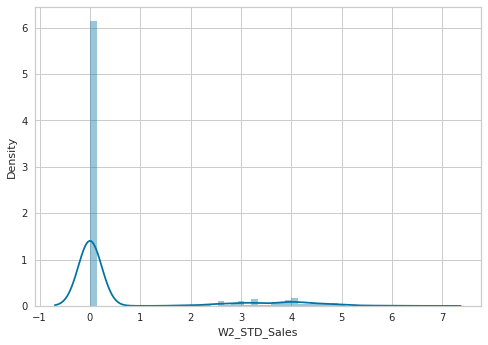

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


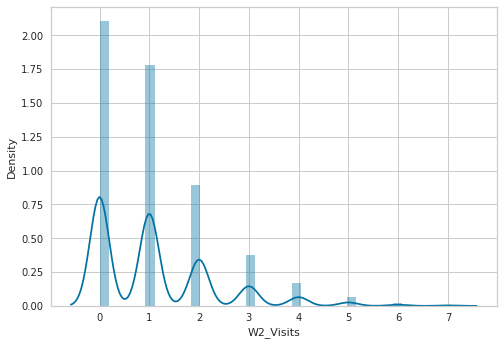

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


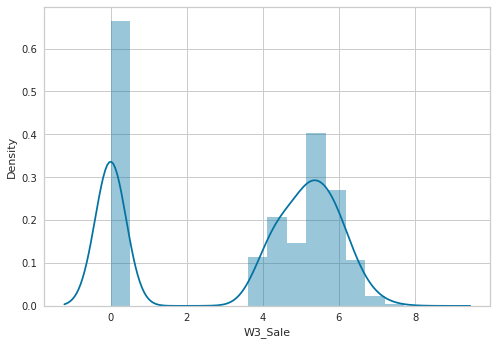

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


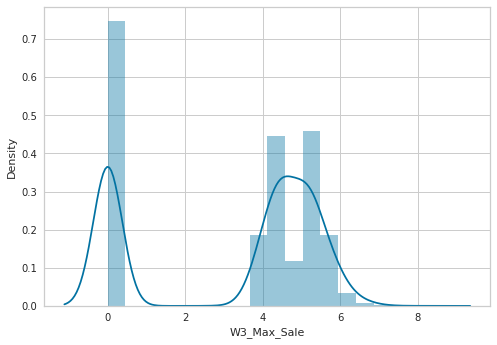

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


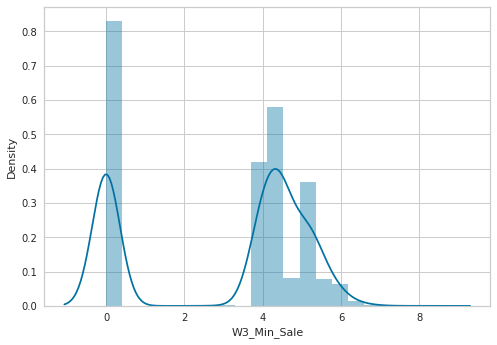

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


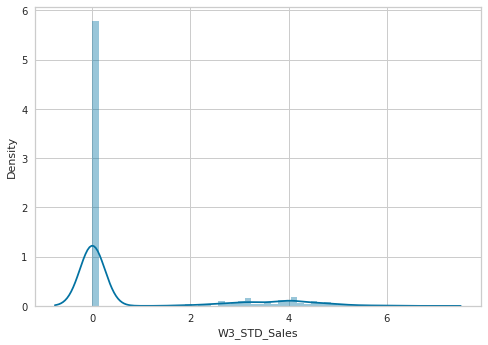

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


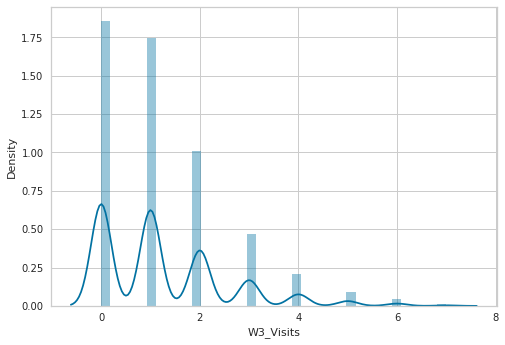

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


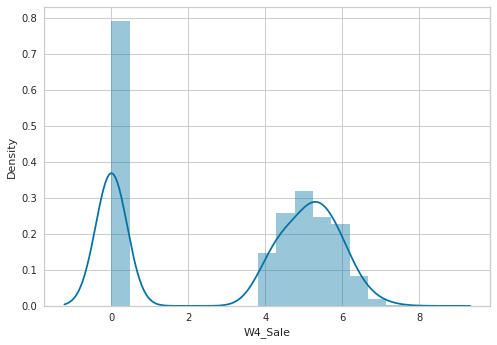

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


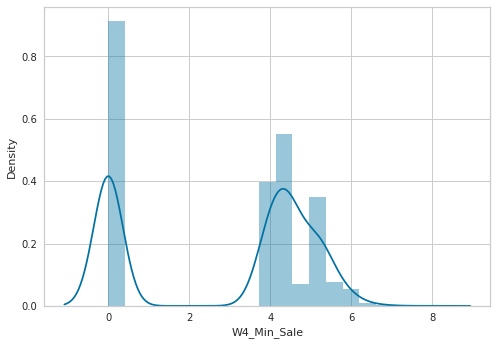

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


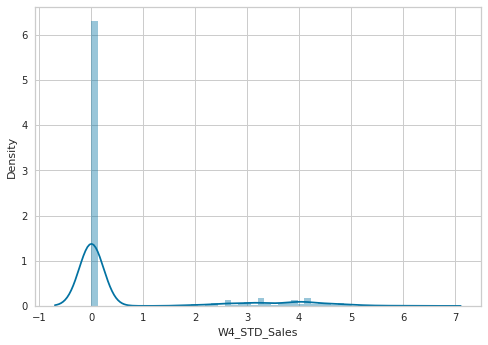

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


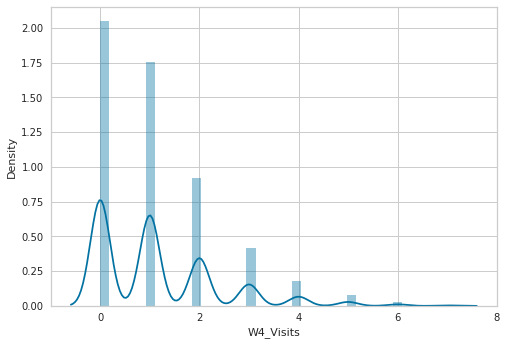

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


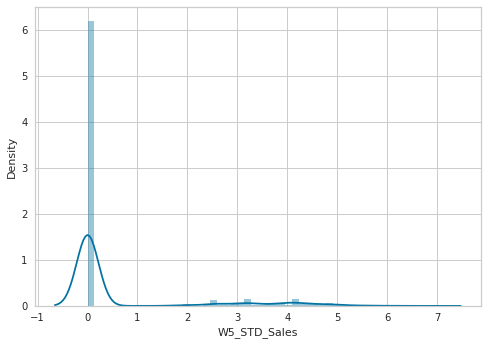

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


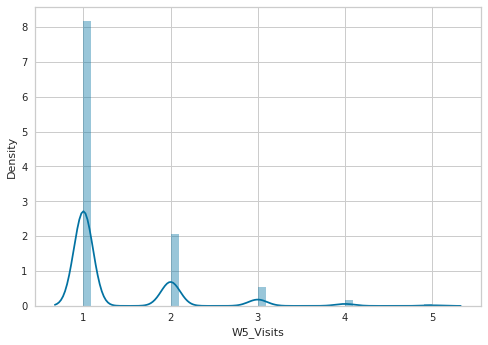

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


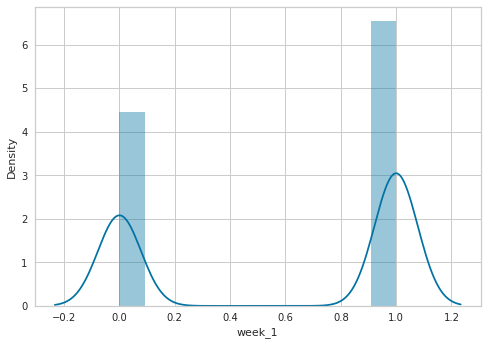

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


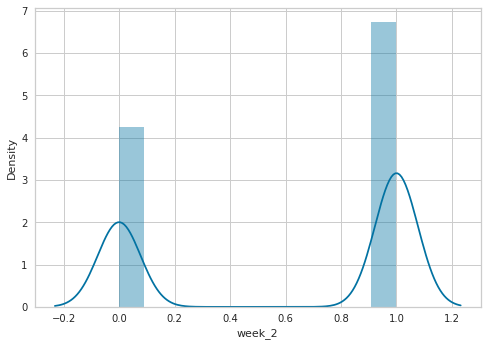

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


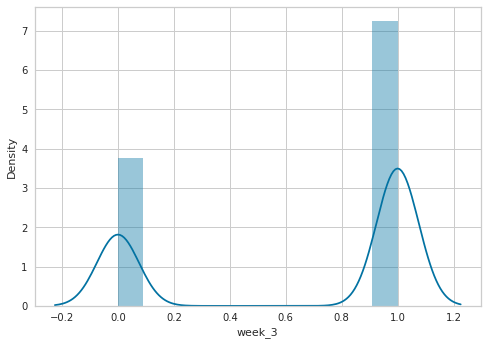

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


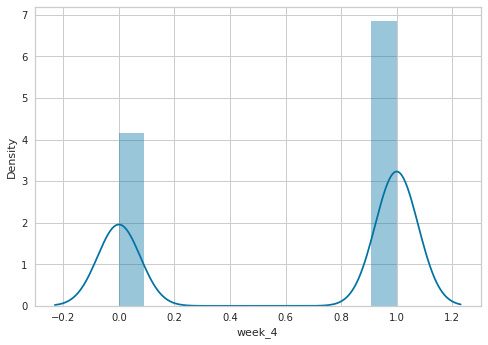

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


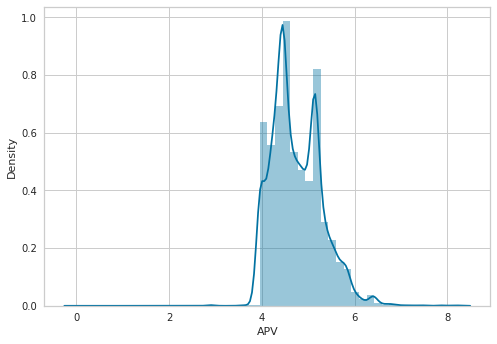

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


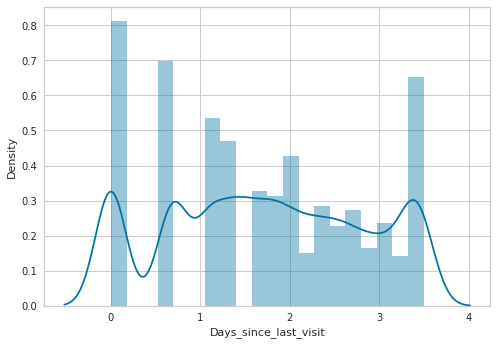

In [25]:
#(e)
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include = "object")
#num
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.show()

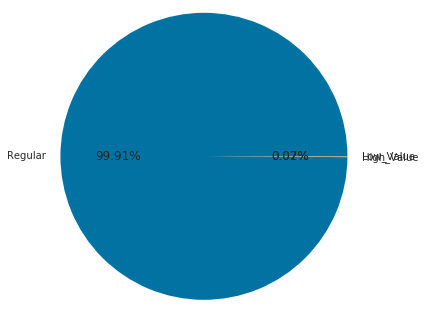

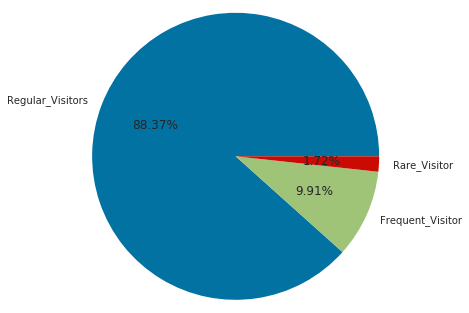

In [28]:
#num
for i in df_cat.columns:
    plt.pie(df_cat[i].value_counts(),labels = df_cat[i].unique(),radius = 1.2, autopct = "%.2f%%")
    plt.show()

In [29]:
# Pair Plot
# sns.pairplot(df)
# We can even check with pair plot

### 2.	Data Preparation (5 marks)

a.	Scale / Transform/ clean the data so that it is suitable for model building.


In [31]:
# Check for missing values
df.isnull().sum()
# There are no missing values

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
Customer_Value           0
Visitors_Type            0
dtype: int64

In [34]:
# We can drop the categorical variables
df1 = df.copy()
df1.head()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,Customer_Value,Visitors_Type
0,1123606416,6.174536,2.286530,1.945910,4.241039,0.000000,1,4.461300,0.000000,1,...,0.000000,1,1,1,1,1,4.393131,1.098612,Regular,Regular_Visitors
1,1174135872,7.351749,4.087801,2.564949,4.461300,4.119498,2,4.794467,3.422721,3,...,0.000000,1,1,1,1,1,4.873873,1.609438,Regular,Regular_Visitors
2,1108114998,6.307807,2.286530,1.945910,4.461300,0.000000,2,0.000000,0.000000,0,...,0.000000,1,1,0,1,1,4.525116,1.098612,Regular,Regular_Visitors
3,1123606602,7.450986,3.234717,3.295837,3.958143,3.559136,6,3.958143,3.176757,5,...,3.283914,4,1,1,1,1,4.207307,0.000000,Regular,Frequent_Visitor
4,1123606376,6.901697,2.791937,1.791759,5.330010,0.000000,1,5.330010,0.000000,1,...,0.000000,1,1,1,1,1,5.296275,1.609438,Regular,Regular_Visitors


In [37]:
df1.drop(columns = ["Customer_Value","Visitors_Type"],axis=1,inplace=True)

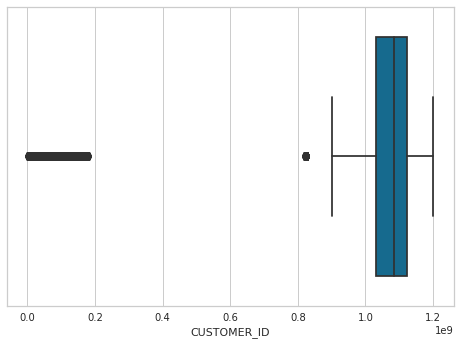

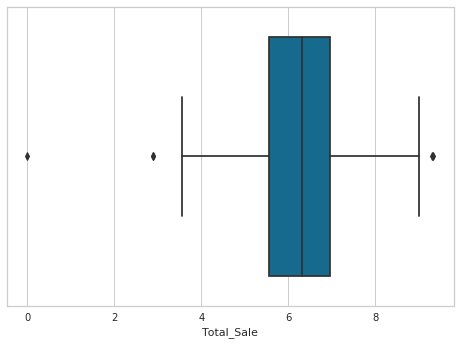

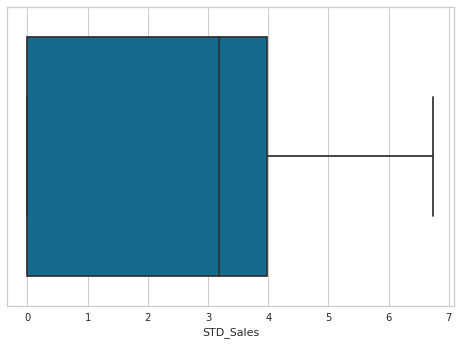

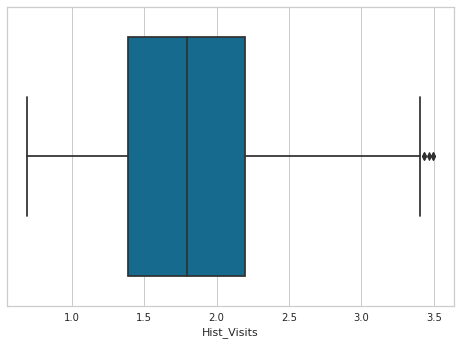

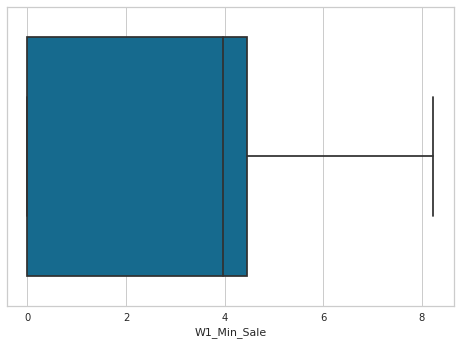

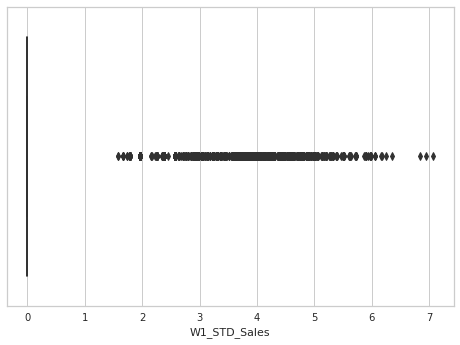

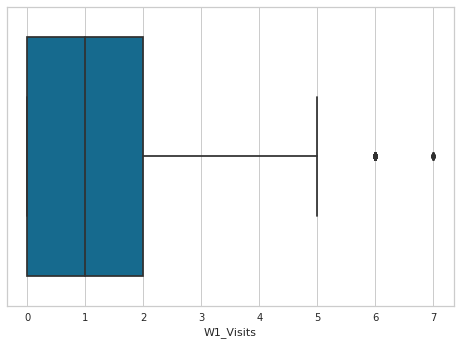

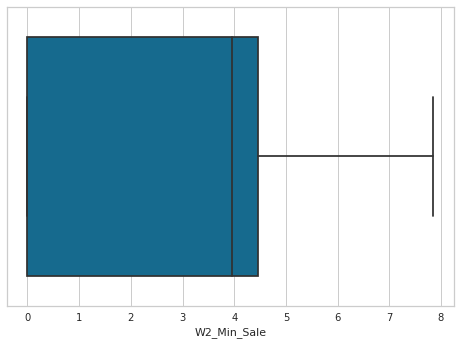

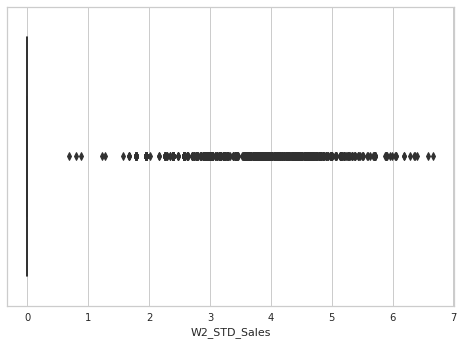

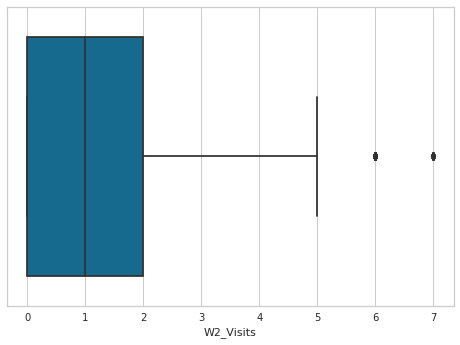

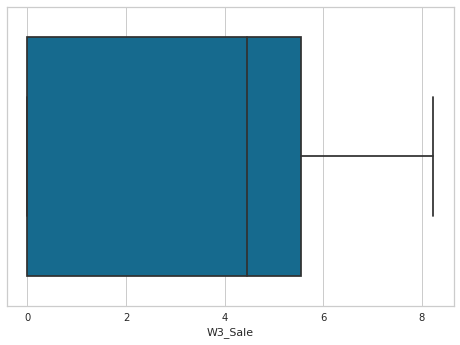

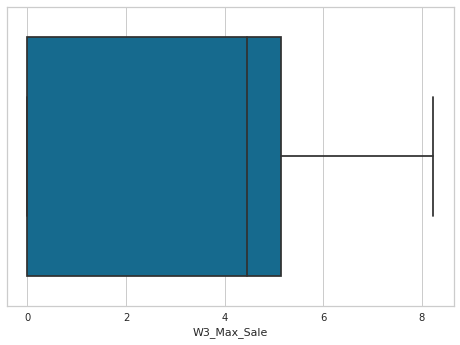

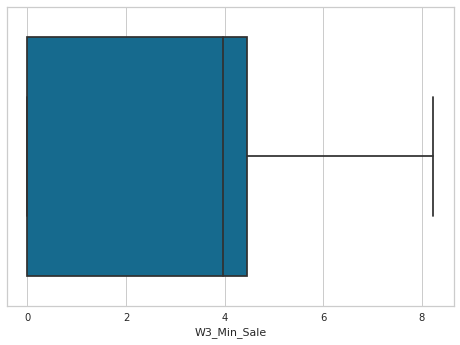

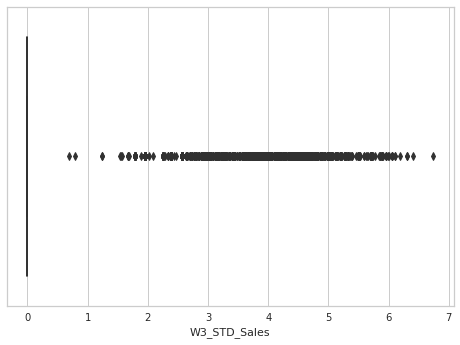

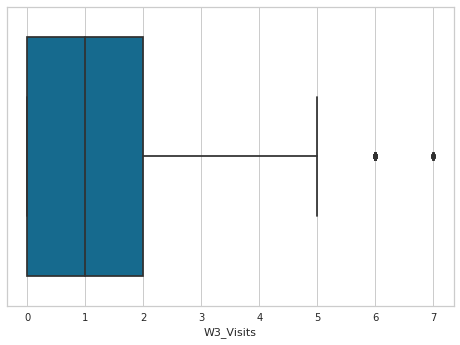

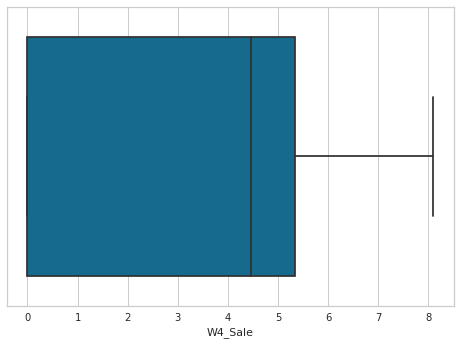

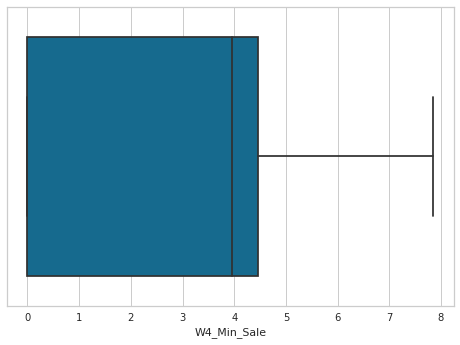

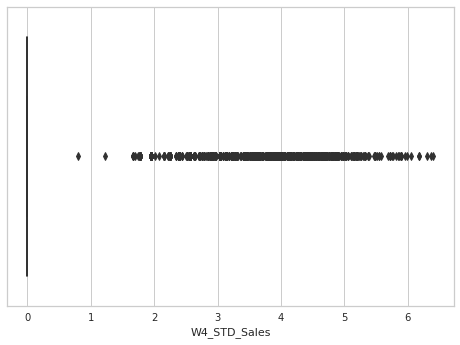

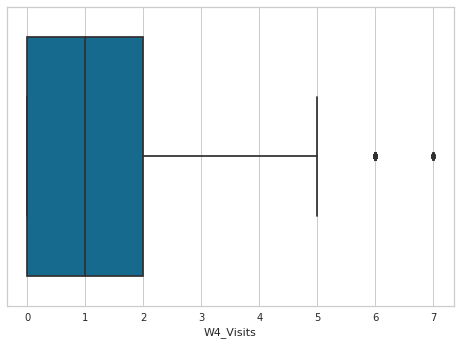

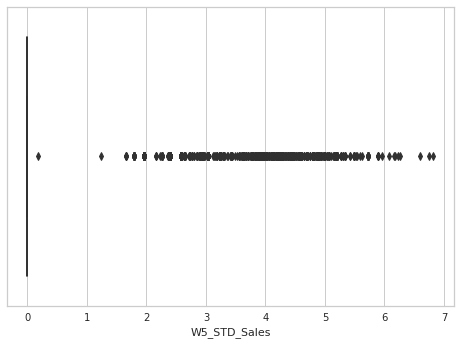

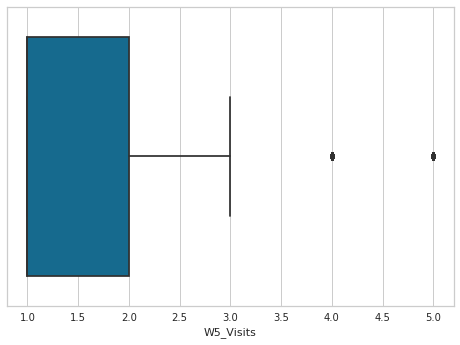

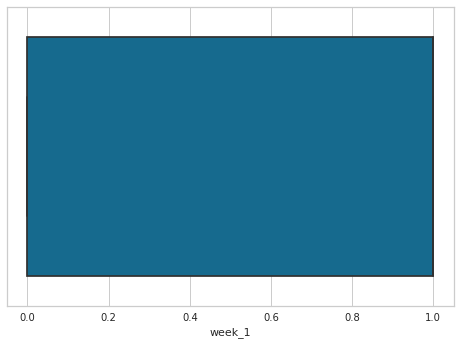

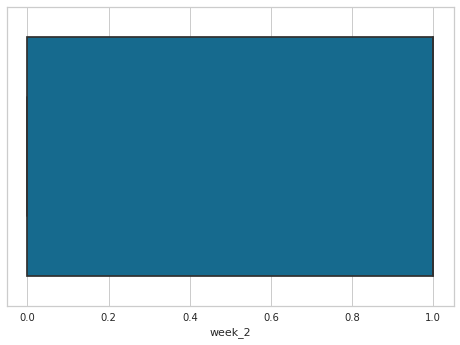

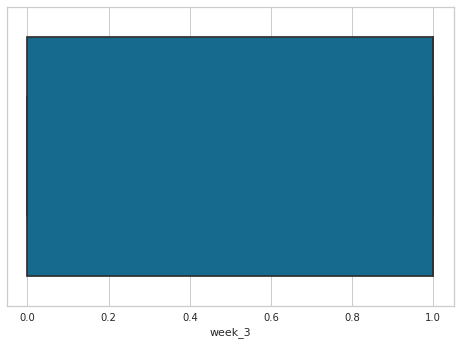

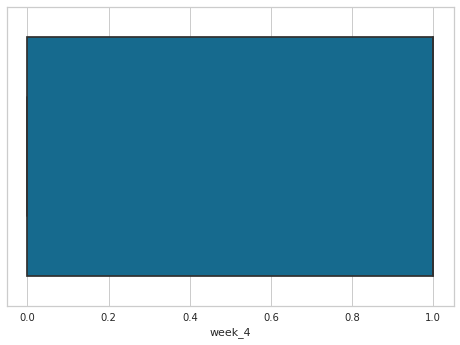

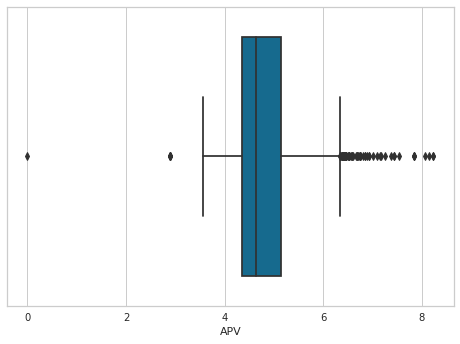

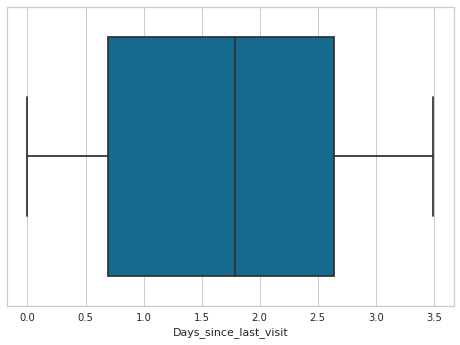

In [39]:
# Check for outliers
for i in df_num.columns:
    sns.boxplot(x=df_num[i])
    plt.show()
# There are outliers in CustomerId,Total sale,Hist_visits,w1 std sales,w1 visits,w2 std sales,w2 visits
# w3 std sales
# w3 visits,w4 std sales
# w4 visits,w5 std sales,w5 visits,apv
# But we are not treating any outliers right now as they lead to any missing or loss of data

In [41]:
# Scaling
ss = StandardScaler()
scaled_data = pd.DataFrame(ss.fit_transform(df1),columns = df1.columns)
scaled_data

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
0,0.534751,-0.067884,-0.187077,0.334378,0.641170,-0.441500,-0.038455,0.707554,-0.454755,-0.074810,...,-0.471161,-0.110262,-0.415443,-0.510501,0.826255,0.795945,0.720398,0.778296,-0.660227,-0.573621
1,0.668542,1.178426,0.807455,1.351984,0.736073,2.426710,0.798113,0.852312,1.877256,1.575968,...,2.775187,0.692789,-0.415443,-0.510501,0.826255,0.795945,0.720398,0.778296,0.222708,-0.107281
2,0.493734,0.073210,-0.187077,0.334378,0.736073,-0.441500,0.798113,-1.230841,-0.454755,-0.900200,...,1.267422,0.692789,-0.415443,-0.510501,0.826255,-1.256367,0.720398,0.778296,-0.417822,-0.573621
3,0.534752,1.283488,0.336444,2.553452,0.519280,2.036557,4.144385,0.488937,1.709672,3.226747,...,-0.471161,3.101943,1.965688,3.847121,0.826255,0.795945,0.720398,0.778296,-1.001514,-1.576562
4,0.534751,0.701958,0.091973,0.080978,1.110372,-0.441500,-0.038455,1.085000,-0.454755,-0.074810,...,-0.471161,-0.110262,-0.415443,-0.510501,0.826255,0.795945,0.720398,0.778296,0.998495,-0.107281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,-0.250511,-3.537777,-1.449533,-1.724973,-1.186154,-0.441500,-0.875023,-1.230841,-0.454755,-0.900200,...,-0.471161,-0.913313,-0.415443,-0.510501,-1.210280,-1.256367,-1.388121,-1.284858,-3.408005,1.497495
10003,0.283362,-3.537777,-1.449533,-1.724973,-1.186154,-0.441500,-0.875023,-1.230841,-0.454755,-0.900200,...,-0.471161,-0.913313,-0.415443,-0.510501,-1.210280,-1.256367,-1.388121,-1.284858,-3.408005,1.528445
10004,0.306976,-2.833570,-1.449533,-1.058450,-1.186154,-0.441500,-0.875023,-1.230841,-0.454755,-0.900200,...,-0.471161,-0.913313,-0.415443,-0.510501,-1.210280,-1.256367,0.720398,-1.284858,-3.408005,1.202830
10005,0.430179,-6.604834,-1.449533,-1.724973,-1.186154,-0.441500,-0.875023,-1.230841,-0.454755,-0.900200,...,-0.471161,-0.913313,-0.415443,-0.510501,-1.210280,-1.256367,-1.388121,-1.284858,-8.728690,1.615455


In [43]:
# Transformation
pt = PowerTransformer()
transformed_data = pd.DataFrame(pt.fit_transform(df1),columns=df1.columns)
transformed_data

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
0,0.588656,-0.134085,-0.207879,0.359314,0.691857,-0.457015,0.348173,0.729064,-0.470367,0.288984,...,-0.488181,0.242834,-0.430680,-0.588434,0.826255,0.795945,0.720398,0.778296,-0.646312,-0.536371
1,0.826959,1.227594,0.808664,1.327856,0.765290,2.194340,1.023217,0.847898,2.128021,1.409494,...,2.062538,0.932915,-0.430680,-0.588434,0.826255,0.795945,0.720398,0.778296,0.264454,-0.063629
2,0.517406,0.009931,-0.207879,0.359314,0.765290,-0.457015,1.023217,-1.239495,-0.470367,-1.146680,...,2.032098,0.932915,-0.430680,-0.588434,0.826255,-1.256367,0.720398,0.778296,-0.389404,-0.536371
3,0.588657,1.351603,0.323738,2.416011,0.595567,2.191009,2.106199,0.545209,2.124878,1.947161,...,-0.488181,1.924642,2.323077,1.821311,0.826255,0.795945,0.720398,0.778296,-1.017513,-1.645860
4,0.588656,0.683186,0.074423,0.110082,1.043257,-0.457015,0.348173,1.034554,-0.470367,0.288984,...,-0.488181,0.242834,-0.430680,-0.588434,0.826255,0.795945,0.720398,0.778296,1.012319,-0.063629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,-0.625602,-2.857090,-1.441083,-1.791597,-1.196956,-0.457015,-1.115808,-1.239495,-0.470367,-1.146680,...,-0.488181,-1.164225,-0.430680,-0.588434,-1.210280,-1.256367,-1.388121,-1.284858,-4.024847,1.444740
10003,0.165410,-2.857090,-1.441083,-1.791597,-1.196956,-0.457015,-1.115808,-1.239495,-0.470367,-1.146680,...,-0.488181,-1.164225,-0.430680,-0.588434,-1.210280,-1.256367,-1.388121,-1.284858,-4.024847,1.472475
10004,0.203797,-2.432189,-1.441083,-1.060038,-1.196956,-0.457015,-1.115808,-1.239495,-0.470367,-1.146680,...,-0.488181,-1.164225,-0.430680,-0.588434,-1.210280,-1.256367,0.720398,-1.284858,-4.024847,1.178489
10005,0.408692,-3.940113,-1.441083,-1.791597,-1.196956,-0.457015,-1.115808,-1.239495,-0.470367,-1.146680,...,-0.488181,-1.164225,-0.430680,-0.588434,-1.210280,-1.256367,-1.388121,-1.284858,-16.776170,1.550224


### 3.	Dimensionality Reduction (15 marks)

a.	How will you decide when to apply PCA based on the correlation? (2 marks) 

b.	Apply PCA on the above dataset and determine the number of PCA components to be used so that 90% of the variance in data is explained by the same. (7 marks)

c.	Build a data frame with the principal components and check if multi-collinearity still exists. ( 2  marks).

d.	Visualize the spread of data across PCA components. (2 marks)

e.	Check for outliers in the PCA data and treat the same. (2 marks)


In [44]:
#(a)
# Correlation indicated that there is redundancy in the data
# due to this redundancy PCA can be used to reduce the original variables into a smaller number of new variables
# explaininf most of the variance in the original variables

In [57]:
#(b)
pca = PCA(n_components = 0.9)
pca.fit_transform(scaled_data)
per_var = pca.explained_variance_ratio_
a = np.cumsum(per_var)

In [59]:
b = a[a<=90]
b


array([0.41887078, 0.51125917, 0.59342704, 0.66099629, 0.72175309,
       0.77428484, 0.81134935, 0.84805685, 0.87521212, 0.90133255])

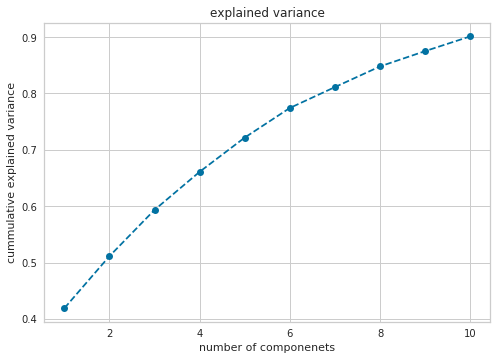

In [62]:
plt.plot(range(1,11),b,marker='o',linestyle='--')
plt.xlabel('number of componenets')
plt.ylabel('cummulative explained variance')
plt.title('explained variance')
plt.show()

In [78]:
#(c)
pca = PCA(n_components = 10, random_state = 10)
components = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=components,columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.342355,-0.885048,0.039283,-1.401294,0.184535,1.432957,0.619827,-0.750971,-0.042271,-0.194733
1,5.067746,0.569330,-0.040872,0.734130,0.317788,0.016833,-3.201457,0.292712,0.440232,0.131874
2,0.933830,-0.335936,0.737362,-1.299607,-2.587955,0.647365,-0.299658,-0.336128,1.037318,0.874396
3,7.543561,2.192295,-1.242561,4.207053,-1.069543,1.300957,0.404635,-0.462584,-1.583289,-0.199139
4,1.782288,-1.114966,0.255327,-2.353438,0.600132,-0.196699,0.632401,-0.925275,-0.018255,0.077761


In [80]:
vif = [variance_inflation_factor(df_pca.values,i) for i in range(df_pca.shape[1])]
vif_df = pd.DataFrame({"Feature":df_pca.columns,'VIF':vif})
vif_df

,Feature,VIF
0,PC1,1.0
1,PC2,1.0
2,PC3,1.0
3,PC4,1.0
4,PC5,1.0
5,PC6,1.0
6,PC7,1.0
7,PC8,1.0
8,PC9,1.0
9,PC10,1.0


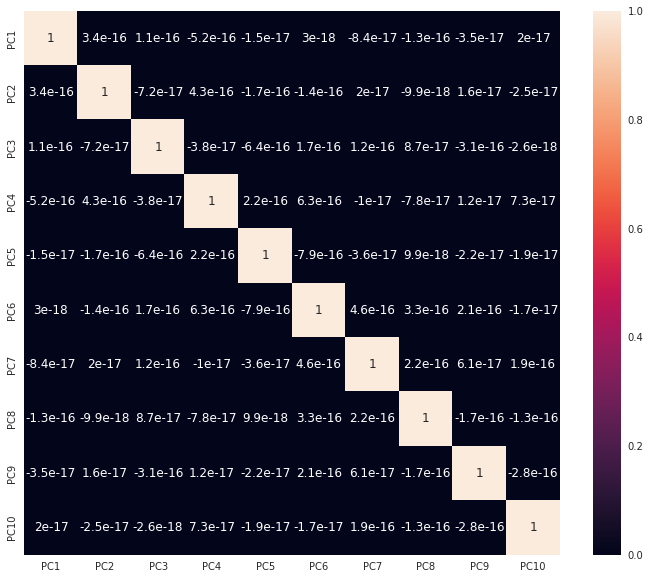

In [81]:
plt.figure(figsize = (12,10))
sns.heatmap(df_pca.corr(),annot=True)

In [82]:
# The correlation among the independent variables is almost zero such that the multicollinearity does not exist

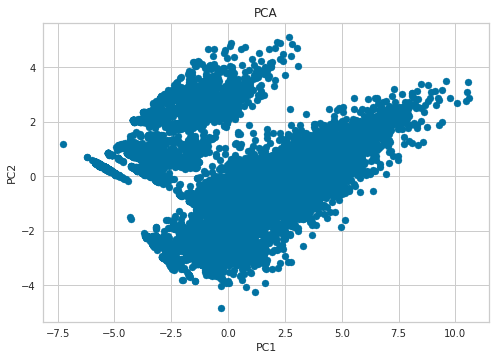

In [88]:
#(c)
plt.scatter(df_pca["PC1"],df_pca["PC2"])
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [91]:
# sns.pairplot(df_pca)
# We can give pairplot and check the clusters

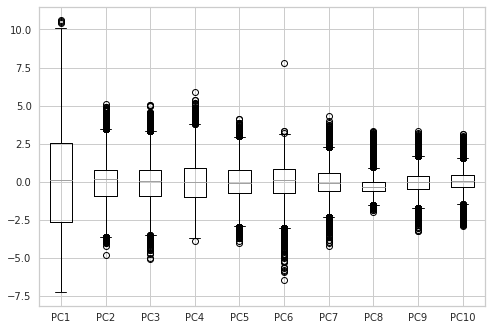

In [93]:
#(e)
df_pca.boxplot()

In [94]:
for i in df_pca.columns:
    ll,q1,q3,ul = df_pca[i].quantile([0.01,0.25,0.75,0.95])
    ll = q1-1.5*(q3-q1)
    ul = q3+1.5*(q3-q1)
    df_pca[i] = df_pca[i].map(lambda x: ll if x<ll else ul if x>ul else x)

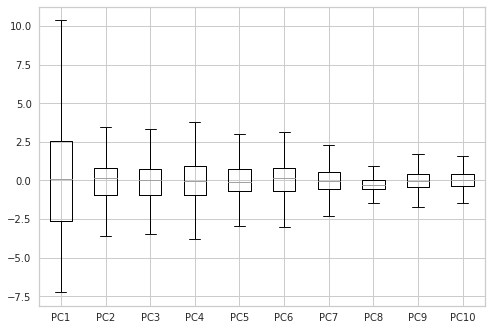

In [95]:
df_pca.boxplot()

### 4.	Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering. (30 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Apply Clustering and visualize the spread of data (15 marks)

b.  Find the optimal number of cluster Value. (8 marks)

c.	Evaluate the clusters formed using appropriate metrics (inertia, silhouette score) to support the model built and compare both the models. (5 marks)

d.	Using best attributes based on the relationship between them, plot the clusters. (2 marks)


In [99]:
#(a)
wcss =[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 10)
    kmeans_pca.fit(df_pca)
    wcss.append(kmeans_pca.inertia_)

In [100]:
wcss

[230457.94539721633,
 150541.16900931823,
 126391.82915320923,
 111692.58238840886,
 99531.08635202247,
 91029.60881973883,
 85055.06058522456,
 80584.03626296065,
 75761.94640468976,
 71637.54379231688]

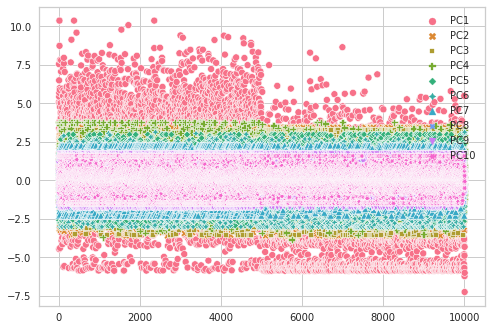

In [109]:
sns.scatterplot(df_pca)
plt.show()

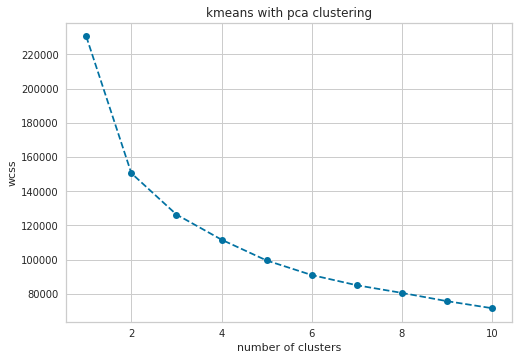

In [110]:
#(b)
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.title("kmeans with pca clustering")
plt.show()

In [111]:
# The Optimal k value from the graph is 2

In [117]:
#(c)
n_cluster = [2,3,4,5,6,7,8,9,10]
for i in n_cluster:
    cluster = KMeans(n_clusters = i,random_state = 10)
    predict = cluster.fit_predict(df_pca)
    score = silhouette_score(df_pca,predict,random_state=10)
    print("for {} clusters the silhouette score is {}".format(i,score))

for 2 clusters the silhouette score is 0.2999636287646537
for 3 clusters the silhouette score is 0.23646785732368575
for 4 clusters the silhouette score is 0.23301319575889723
for 5 clusters the silhouette score is 0.25093431605343264
for 6 clusters the silhouette score is 0.25358618786981624
for 7 clusters the silhouette score is 0.25249860571086274
for 8 clusters the silhouette score is 0.23303159258004935
for 9 clusters the silhouette score is 0.23972230836486036
for 10 clusters the silhouette score is 0.2823935606544101


In [121]:
# for 2 clusters silhouette score is 0.299 which is highest

In [118]:
wcss =[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 10)
    kmeans_pca.fit(df_pca)
    wcss.append(kmeans_pca.inertia_)
wcss

[230457.94539721627,
 150541.16900931826,
 126391.8291532092,
 111692.58238840886,
 99531.0863520225,
 91029.60881973882,
 85055.06058522456,
 80584.03626296067,
 75761.94640468972,
 71637.54379231688]

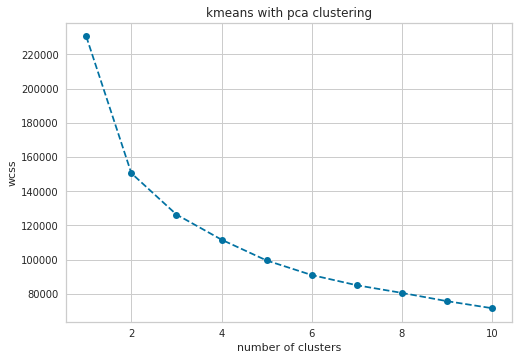

In [119]:
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.title("kmeans with pca clustering")
plt.show()

In [120]:
# Hence clusters are evaluated using Silhouette score and inertia where we got the optimal value of K is 2

In [123]:
#(d)
new_clusters = KMeans(n_clusters = 2,random_state = 10)
new_clusters.fit(df_pca)
df_pca["cluster"] = new_clusters.labels_
df["cluster"] = new_clusters.labels_
scaled_data["cluster"] = new_clusters.labels_

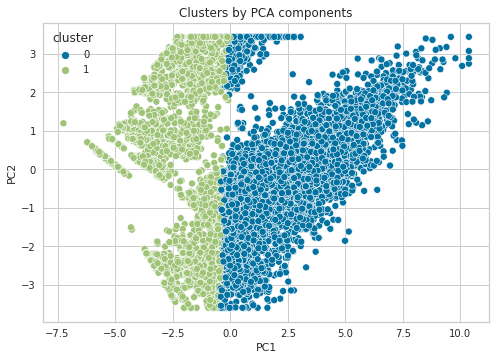

In [125]:
sns.scatterplot(x=df_pca["PC1"],y=df_pca["PC2"],hue = df_pca["cluster"])
plt.title("Clusters by PCA components")
plt.show()

### 5.	Use the cluster labels from the best method above and interpret the clusters formed. (5 marks)

In [134]:
df[df["cluster"]==0].describe(include = np.number).T

# The mean of Week 1 , Week 2, Week 3 and Week 4 is almost similar
# Such that the the minimum sales of week 1,week2,week3,week4 are almsost equal
# The max sale id also almost equal
# The Minimum sale has slightly increased in week 3 and week 4
# The Overall total sale mean is 6.85
# This is for cluster 0 numerical variables
# Count is 5430

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,5430.0,9.108392e+08,3.842750e+08,142292.000000,1.022265e+09,1.082663e+09,1.119552e+09,1.201021e+09
Total_Sale,5430.0,6.857229e+00,5.665221e-01,5.330010,6.441879e+00,6.866642e+00,7.259791e+00,9.332576e+00
STD_Sales,5430.0,3.337349e+00,1.369156e+00,0.000000,2.864455e+00,3.670753e+00,4.189076e+00,6.743348e+00
Hist_Visits,5430.0,2.183245e+00,3.908626e-01,1.098612,1.945910e+00,2.079442e+00,2.397895e+00,3.496508e+00
W1_Min_Sale,5430.0,3.942043e+00,1.730808e+00,0.000000,3.958143e+00,4.461300e+00,5.148657e+00,7.089577e+00
W1_STD_Sales,5430.0,1.100190e+00,1.752473e+00,0.000000,0.000000e+00,0.000000e+00,2.706611e+00,7.071294e+00
W1_Visits,5430.0,1.644015e+00,1.252949e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
W2_Min_Sale,5430.0,3.977774e+00,1.709106e+00,0.000000,3.958143e+00,4.461300e+00,5.148657e+00,7.446001e+00
W2_STD_Sales,5430.0,1.133197e+00,1.767580e+00,0.000000,0.000000e+00,0.000000e+00,2.897016e+00,6.669331e+00
W2_Visits,5430.0,1.685820e+00,1.267065e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00


In [135]:
df[df["cluster"]==0].describe(include = "object").T
# The Visitors type is Regular Visits
# The Customer value is Regular
# The count is 5430

,count,unique,top,freq
Customer_Value,5430,2,Regular,5428
Visitors_Type,5430,2,Regular_Visitors,5258


In [132]:
df[df["cluster"]==1].describe(include = np.number).T
# The Total sale mean is 5.50 which is less when compared to cluster = 0
# The week1,week2,week3,week4 means are almost similar but are slightly less whe compared to cluster 0
# The total count is 4577
# The minimum sales in week 1,week 2,week 3, week 4 are almost similar but are slightly less compared to cluster = 0
# The maximum sales in week 1, week 2, week 3, week4 are almost similar but are slightly less compared to cluster = 0

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,4577.0,9.344615e+08,3.693692e+08,141546.000000,1.039184e+09,1.087939e+09,1.126638e+09,1.201021e+09
Total_Sale,4577.0,5.504802e+00,7.600067e-01,0.000000,5.043941e+00,5.552184e+00,6.020732e+00,8.949625e+00
STD_Sales,4577.0,1.780677e+00,1.906417e+00,0.000000,0.000000e+00,0.000000e+00,3.619449e+00,6.663166e+00
Hist_Visits,4577.0,1.219611e+00,3.521920e-01,0.693147,1.098612e+00,1.098612e+00,1.386294e+00,2.397895e+00
W1_Min_Sale,4577.0,1.342241e+00,2.134748e+00,0.000000,0.000000e+00,0.000000e+00,3.958143e+00,8.234140e+00
W1_STD_Sales,4577.0,8.116668e-02,5.512591e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.830737e+00
W1_Visits,4577.0,3.364649e-01,5.782033e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
W2_Min_Sale,4577.0,1.474515e+00,2.171964e+00,0.000000,0.000000e+00,0.000000e+00,3.958143e+00,7.851272e+00
W2_STD_Sales,4577.0,1.149019e-01,6.643333e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.184616e+00
W2_Visits,4577.0,3.845314e-01,6.214453e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


In [138]:
df[df["cluster"]==1].describe(include = "object").T
# The count is 4577
# The frequency is 4570 for customer_value and 3585 for visitors_type
# The Customer value is Regular
# The Visitors_type is Regular_visitors

,count,unique,top,freq
Customer_Value,4577,2,Regular,4570
Visitors_Type,4577,2,Regular_Visitors,3585


### 6.	Summarize as follows (10 marks)

a.	Summarize the overall fit of the model. Compare all the clustering models built and list down the measures to prove that it is a good model.

b.	Write down a business interpretation/explanation of the model.

c.	What are the key risks to your results and interpretation?


In [139]:
#(a)
# Kmeans

# Inertia - Inertia is defined as the sum of the squares of distance in the samples to their closest cluster centers
# Lower Inertia means clustering
# Silhouette Score - It measurs how similar an object is to its own cluster compared to other clusters
# Score ranges from -1 to 1, where higher values indicates better clustering

# In our case the Silhouette score is high for 2 which is 0.299 when compared to others
# The inertia is 
wcss =[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 10)
    kmeans_pca.fit(df_pca)
    wcss.append(kmeans_pca.inertia_)
wcss
# The Multicollinearity is almost zero indicating that this is a good model

[232941.5178964668,
 150540.94797618187,
 127370.0794612802,
 112415.50191227633,
 100360.87175133404,
 91803.89508513674,
 86093.84171030848,
 81382.42409795156,
 76386.92251771799,
 72670.29154336447]

In [140]:
#(b)
# Cluster Characteristics - The clusters identified by the KMeans algorithm representing distinct customers segments
# For example Which customers are highly interested to buy which products
# Most Frequently which products are being searched
# On which ecommerce website they are willing to buy

# Actionable insights - We can segment customers based on their purchase

# Data Driven Decision - Understanding these customer segments allow business to allocate resources more efficiently
# and design targeted marketing campaigns that can improve customer retention and sales

In [ ]:
#(c)
# Data Quality and preprocessing - If there is any noise in the data it lead to inaccurate clustering results
# Outliers and missing values to be handled in order to avoid skewness of results

# Choice of clustering algorithm - Different algorithms yield different clustering results
# The choice of algorithm should align with data characteristics
# For example Kmeans cannot perform well on non spherical clusters whereas
# DBSCAN do perform well on non spherical clusters but fail to identify clusters accurately in the presence of noise

# Parameter Sensitivity - clustering requires parameter tuning
# The results can vary significantly with diffeent parameter setting and 
# improper tuning lead to suboptimal clustering

# Interpretability - Clusters should be interpretable and meaningful to the business context.
# If the clusters do not provide actionable insights their practical utility is limited

# Scalability - For large data sets some clustering algorithms may not scale well.
# Efficient algorithms and computational resources are needed to handle large scale data